In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"hospital_readmissions.csv")

In [8]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [18]:
df.shape

(25000, 17)

In [15]:
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [17]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


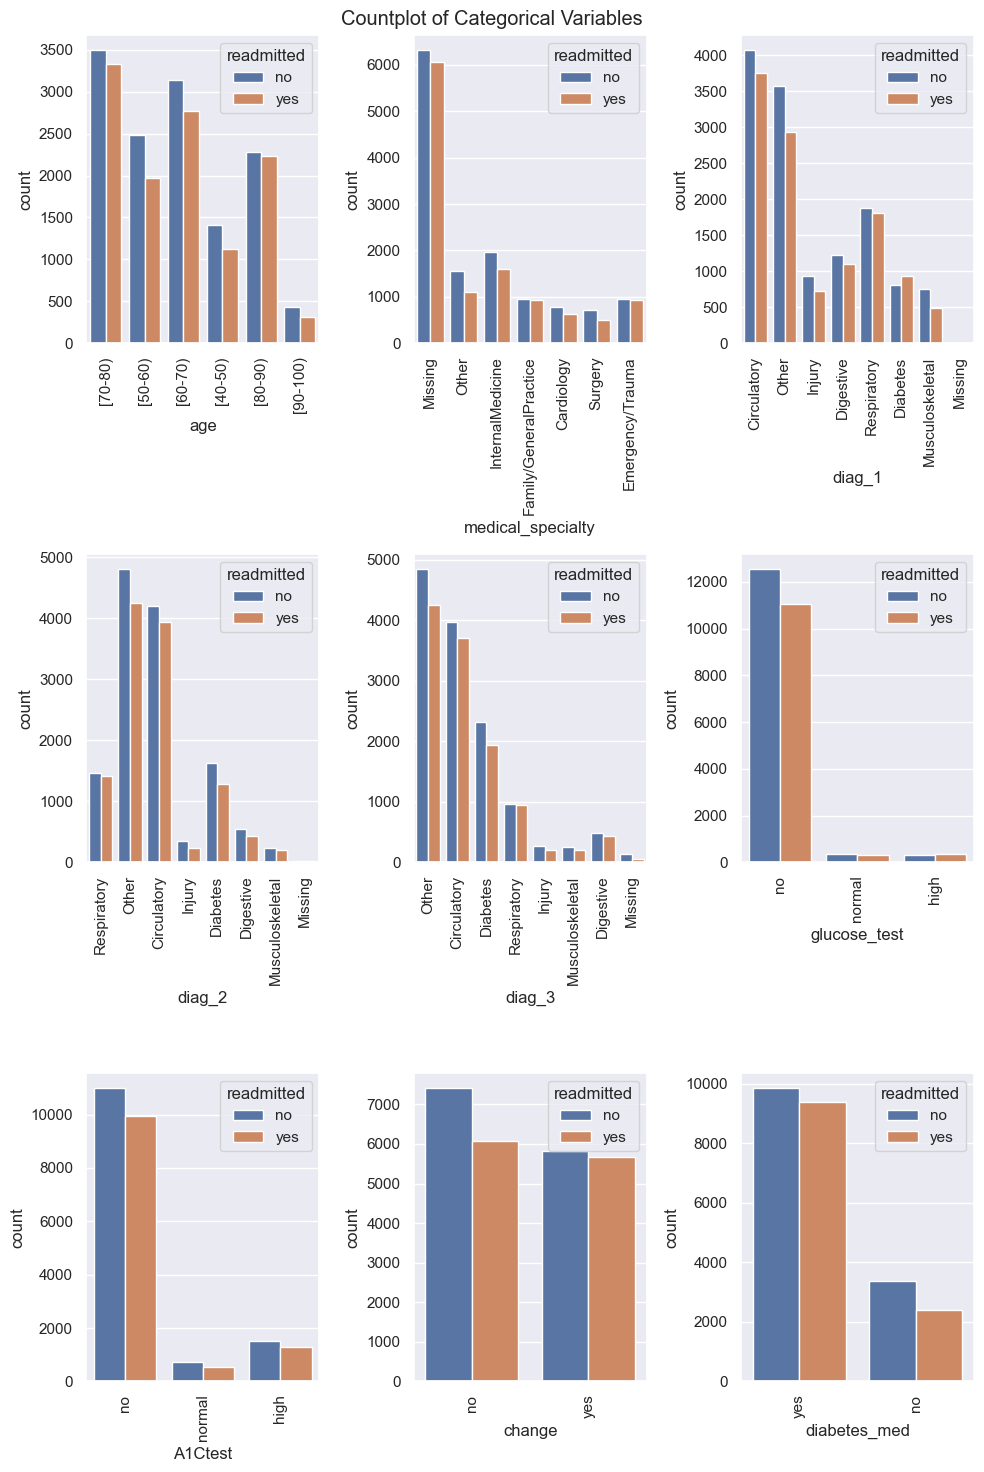

In [19]:
# list of categorical data to plot
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# creating figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,15))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

for i,var in enumerate(cat_vars):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()

from this analysis of categorical variables major conclusion is we can see that most of the patients are from age group 70 to 90, most of the patients are diabetic patients and patients who has not tested A1c test. 

In [20]:
from sklearn.preprocessing import LabelEncoder

#looping over each column
for col in df.select_dtypes(include='object').columns:
    # initializing a labelencoder object
    le = LabelEncoder()
    
    # transform values of the column
    df[col] = le.fit_transform(df[col])
    
    # print unique encoded of value of each column
    print(f"{col}:{df[col].unique()}")

age:[3 1 2 0 4 5]
medical_specialty:[4 5 3 2 0 6 1]
diag_1:[0 6 3 2 7 1 5 4]
diag_2:[7 6 0 3 1 2 5 4]
diag_3:[6 0 1 7 3 5 2 4]
glucose_test:[1 2 0]
A1Ctest:[1 2 0]
change:[0 1]
diabetes_med:[1 0]
readmitted:[0 1]


In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced')

In [24]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 0]


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1919  739]
 [1216 1126]]


0.609